### 👩‍🦰 Marjan Atashkar



### <span style="color: #1F618D;">🔍 Comprehensive Dataset Overview</span>

This dataset encapsulates detailed information on **301 vehicles** across **9 critical attributes**, offering a rich source for analyzing factors that influence car pricing in the pre-owned vehicle market. The data structure is as follows:

- **Car_Name 🚗**: The make and model of the vehicle (categorical).
- **Year 📅**: The manufacturing year of the vehicle (numerical), a key determinant of depreciation.
- **Selling_Price 💰**: The final transaction price (target variable, numerical), serving as the dependent variable for predictive analysis.
- **Present_Price 📈**: The current market price (numerical), acting as a pivotal independent variable influencing selling price.
- **Kms_Driven 🚙**: The total kilometers driven (numerical), directly correlating to the car’s wear and perceived value.
- **Fuel_Type ⛽**: Type of fuel (categorical: Petrol, Diesel, CNG), influencing cost of ownership and market demand.
- **Seller_Type 👤**: Categorical variable indicating whether the seller is an individual or dealer, impacting the sales strategy and perceived trustworthiness.
- **Transmission ⚙️**: Gearbox type (categorical: Manual or Automatic), contributing to buyer preferences.
- **Owner 👥**: The number of previous owners (numerical), influencing market perception and potential resale value.

---

### <span style="color: #1F618D;">📊 Analytical Approach and Predictive Modeling</span>

The goal of this project is to build a robust **Linear Regression Model** that accurately predicts the **Selling Price** of a vehicle based on a set of independent variables, thus enabling data-driven decision-making for stakeholders in the automotive market.

#### What is Linear Regression?

Linear regression is a statistical method that models the relationship between a dependent variable and one or more independent variables. The core idea is to find the best-fitting straight line (linear equation) through the data points, minimizing the differences (errors) between the predicted values and the actual values. 

### <span style="color: #1F618D;">📊 Analytical Workflow and Steps</span>

Our analysis is structured into several key phases:

1. **Data Preprocessing and Cleaning 🧹**:
   - Handling missing data points and transforming categorical variables into numerical representations.
   - Conducting exploratory analysis to understand the distribution and relationships between variables.

2. **Feature Engineering 🔧**:
   - Creating new derived variables, such as the age of the car, to capture hidden patterns and improve model accuracy.
   
3. **Model Development 🏗️**:
   - Implementing the linear regression model using relevant features like **Present_Price**, **Kms_Driven**, and categorical variables for **Fuel_Type**, **Seller_Type**, and **Transmission**.
   
4. **Model Optimization ⚙️**:
   - Employing techniques such as **cross-validation**, **feature scaling**, and regularization (Lasso/Ridge) to reduce overfitting and improve generalization.
   
5. **Evaluation Metrics 📊**:
   - Using metrics such as **R-squared**, **Mean Squared Error (MSE)**, and **Mean Absolute Error (MAE)** to quantify model performance and ensure it generalizes well to unseen data.

---

### <span style="color: #1F618D;">🚀 Conclusion and Next Steps</span>

The final model will provide a comprehensive understanding of how various factors influence the selling price of used cars, aiding in better pricing strategies and market analysis. Moving forward, we will refine the model further through iterative feature selection, hyperparameter tuning, and by exploring non-linear relationships, such as polynomial features, if applicable.

By leveraging this data-driven approach, we aim to provide stakeholders with actionable insights to make informed decisions in the highly competitive automotive market.


## 📚 Import Library & Data Set

In [1]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter("ignore")
plt.style.use('seaborn')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
data = pd.read_csv(r"/kaggle/input/car-data/cardata.csv" )
dff = pd.DataFrame(data)
dff

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
dff.describe(include = 'all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [4]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# 

## 📊✨ DataSet Preparing


In [5]:
df = dff.copy()
df1 = df.drop("Car_Name" , axis = 1)
df1

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Since we do not need the **'Car_Name'** column for our analysis, we will remove it from the dataframe to focus on more relevant columns. ✨📊

We clean up our data, but in real-world models, it's generally better not to reshape the target variable unless necessary. 🧹🎯


# 

In [6]:
def split_and_check_syntax(df1):
    df1_cat = df1.select_dtypes(['object'])  
    df1_num = df1.select_dtypes(['int64', 'float64'])
    
    for col in df1_cat:
        check_syntax = df1_cat[col].value_counts().to_frame().reset_index()
        check_syntax.rename(columns={col: 'Count', 'index': col}, inplace=True)

        styled_df = (check_syntax.style
                     .set_caption(f"Check syntax error in '{col}' column")
                     .set_table_styles({
                         'Count': [{'selector': '', 'props': [('background-color', 'lightblue')]}]
                     })
                     .set_table_attributes('style="width: 100%; max-width: 800px;"')  # Adjust the width as needed
                     .set_properties(**{'max-width': '300px', 'white-space': 'nowrap'})  # Prevent wrapping in cells
                     )

        display(styled_df)

    return df1_cat, df1_num

df1_cat, df1_num = split_and_check_syntax(df1)


,Count,count
0,Petrol,239
1,Diesel,60
2,CNG,2


,Count,count
0,Dealer,195
1,Individual,106


,Count,count
0,Manual,261
1,Automatic,40


### Data Quality Analysis
   
The output of the code indicates that there are no syntax errors in the data. 
This result suggests that all values in the categorical columns are recorded correctly, 
 and there are no invalid or duplicate entries in the dataset.
    
 Additionally, this process helps us detect noise in the data, ensuring a cleaner and more reliable dataset for analysis.
   

# 

In [7]:
#Count the total number of duplicated entries in the dataframe using
duplicate_count = df1.duplicated().sum()
duplicates_df_unique = df1[df1.duplicated(keep=False)].drop_duplicates()
print("Total number of duplicated entries:", duplicate_count)
print("Unique duplicated entries:")
duplicates_df_unique

Total number of duplicated entries: 2
Unique duplicated entries:


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
15,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [8]:
# Removing duplicate rows from the main DataFrame
df1.drop_duplicates(inplace=True)
# Displaying the new number of rows
new_row_count = df1.shape[0]
new_row_count


299

In [9]:
df1

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
Age=2019-df["Year"]
Age

0       5
1       6
2       2
3       8
4       5
       ..
296     3
297     4
298    10
299     2
300     3
Name: Year, Length: 301, dtype: int64

### 📅 Car Age Calculation

Since the data is from the year 2019, we subtract the values in the **'Year'** column from 2019 to calculate the age of the cars. This helps us analyze the data more effectively, and we add the **'Age'** column to the dataset.


# 

In [11]:
#inserting the age column
df1.insert (1 , "Age" ,Age[0:301:] , True)

In [12]:
# Deleting the 'Year' column
df2 = df1.drop("Year" , axis = 1)
df2

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [13]:
np.shape(df2)

(299, 8)

## 📉 Missing Values Analysis

In our dataset, we identified and addressed missing values to enhance the quality of our analysis. 
**Missing values can lead to biases and inaccuracies** in model predictions, so it's crucial to handle them effectively.

#### Strategies for Handling Missing Values
- **Deletion:** Rows with missing values can be removed if the missingness is negligible.
- **Imputation:** We can replace missing values with statistical measures, such as **mean**, **median**, or **mode**, depending on the distribution of the data.
- **Flagging:** Creating a new binary column to indicate whether a value was originally missing can help retain information about the missingness.




In [14]:
df2.isna().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
df2

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


# 

## <span style="color: #004080;">🔍 Exploratory Data Analysis (EDA)</span>


## 📊 Draw Plot and Recognize Noise

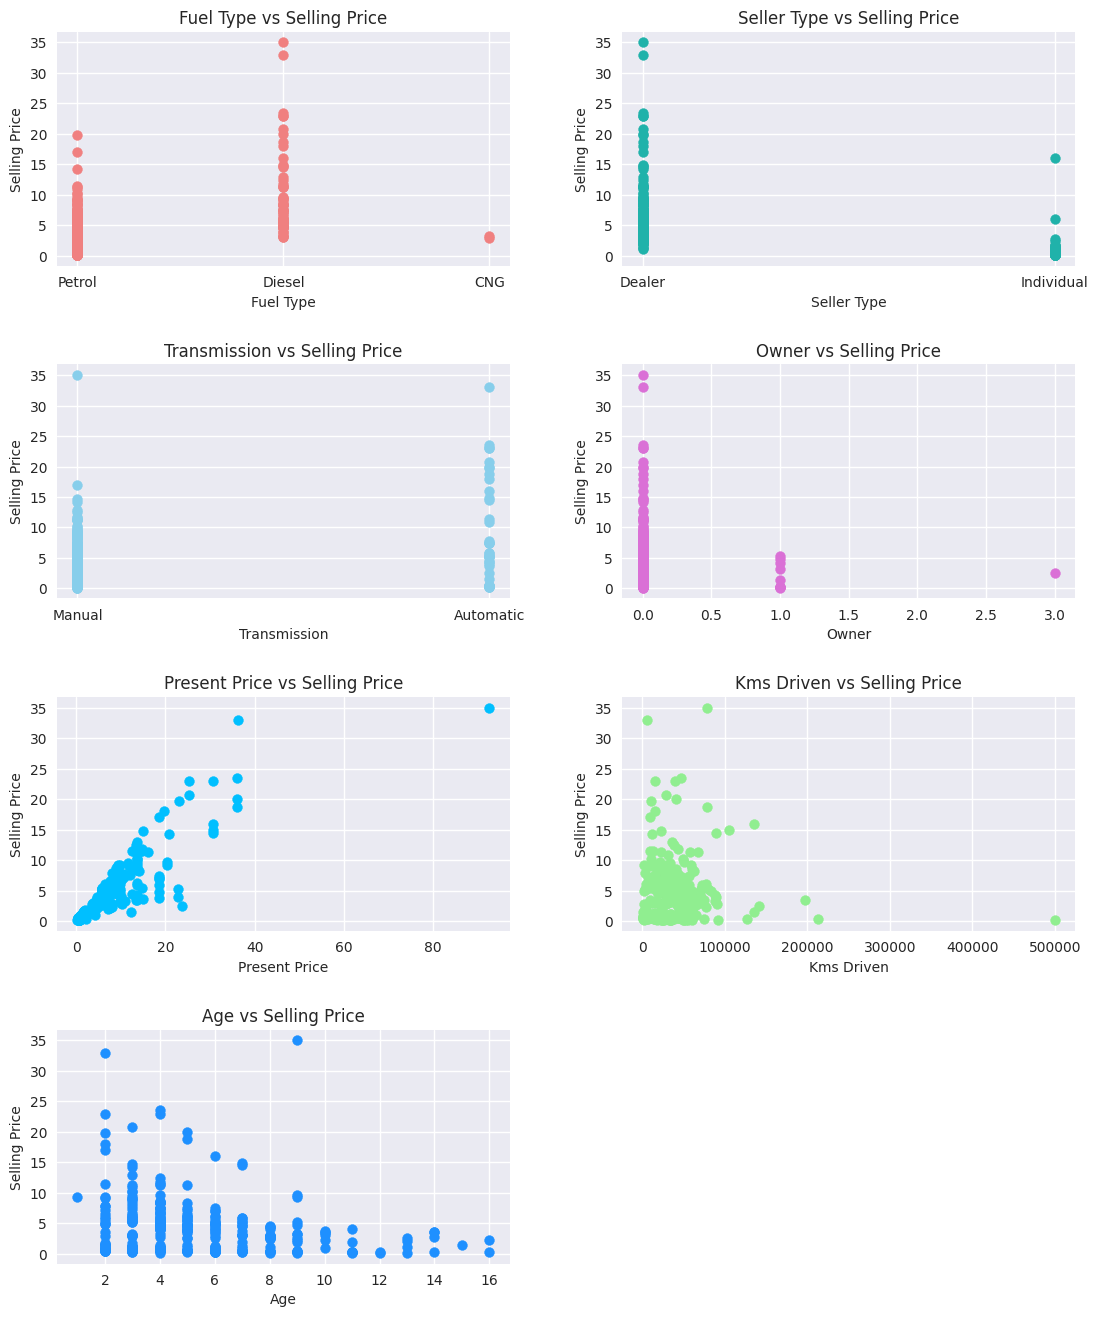

In [16]:
plt.style.use('seaborn-darkgrid')

fig, axes = plt.subplots(4, 2, figsize=(12, 14))
fig.tight_layout(pad=5.0)

def create_scatter_plot(ax, x, y, title, xlabel, ylabel, color):
    ax.scatter(x, y, color=color, s=50)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)

# Plot 1: Fuel Type vs Selling Price
create_scatter_plot(axes[0, 0], df2["Fuel_Type"], df2["Selling_Price"], "Fuel Type vs Selling Price", "Fuel Type", "Selling Price", "lightcoral")

# Plot 2: Seller Type vs Selling Price
create_scatter_plot(axes[0, 1], df2["Seller_Type"], df2["Selling_Price"], "Seller Type vs Selling Price", "Seller Type", "Selling Price", "lightseagreen")

# Plot 3: Transmission vs Selling Price
create_scatter_plot(axes[1, 0], df2["Transmission"], df2["Selling_Price"], "Transmission vs Selling Price", "Transmission", "Selling Price", "skyblue")

# Plot 4: Owner vs Selling Price
create_scatter_plot(axes[1, 1], df2["Owner"], df2["Selling_Price"], "Owner vs Selling Price", "Owner", "Selling Price", "orchid")

# Plot 5: Present Price vs Selling Price
create_scatter_plot(axes[2, 0], df2["Present_Price"], df2["Selling_Price"], "Present Price vs Selling Price", "Present Price", "Selling Price", "deepskyblue")

# Plot 6: Kms Driven vs Selling Price
create_scatter_plot(axes[2, 1], df2["Kms_Driven"], df2["Selling_Price"], "Kms Driven vs Selling Price", "Kms Driven", "Selling Price", "lightgreen")

# Plot 7: Age vs Selling Price
create_scatter_plot(axes[3, 0], df2["Age"], df2["Selling_Price"], "Age vs Selling Price", "Age", "Selling Price", "dodgerblue")

axes[3, 1].axis('off')
plt.show()

Although some data points in the **'Selling Price'** and **'Kms Driven'** columns may initially seem like outliers, they are meaningful and valid observations. Despite being distant from the majority of the dataset, these values align with the nature of the data and cannot be disregarded as noise. By retaining them, we ensure a more **comprehensive** and **accurate** analysis. 📊✨


# 

In [17]:
#categorcal columns
categorical_columns = df2.select_dtypes(include=['object', 'category']).columns.tolist()
print("categorcal columns:")
print(categorical_columns)

categorcal columns:
['Fuel_Type', 'Seller_Type', 'Transmission']


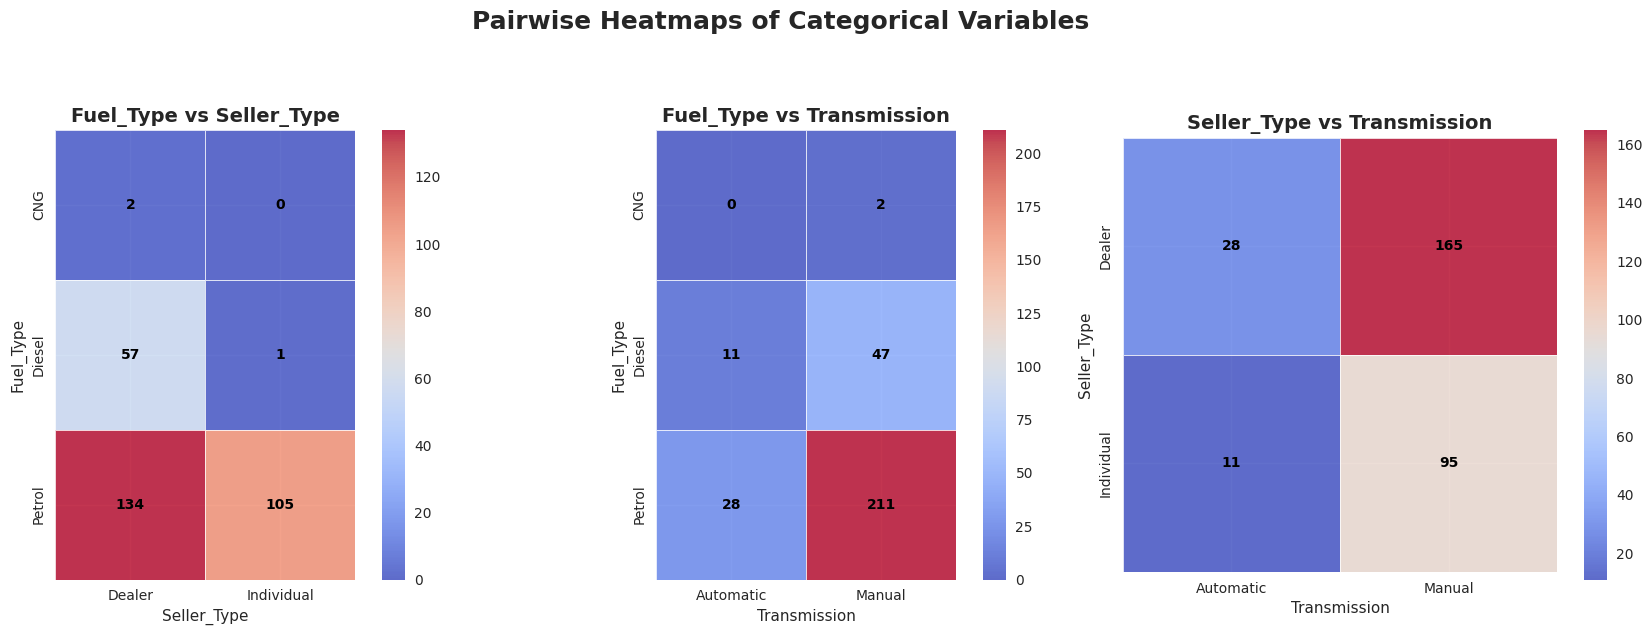

In [18]:
plt.figure(figsize=(18, 6))
num_cols = len(categorical_columns)
plot_number = 1

# Create a single row of subplots for the pairwise heatmaps
for i in range(num_cols):
    for j in range(i + 1, num_cols):
        plt.subplot(1, num_cols * (num_cols - 1) // 2, plot_number)
        
        cross_tab = pd.crosstab(df2[categorical_columns[i]], df2[categorical_columns[j]])
        
        sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d', cbar=True,
                    linewidths=0.5, linecolor='white', alpha=0.8, 
                    square=True, annot_kws={"size": 10, "weight": 'bold', "color": 'black'})
        
        plt.title(f'{categorical_columns[i]} vs {categorical_columns[j]}', fontsize=14, weight='bold')
        
        plot_number += 1

plt.tight_layout()
plt.suptitle('Pairwise Heatmaps of Categorical Variables', fontsize=18, weight='bold', y=1.05)
plt.subplots_adjust(top=0.85)  # Adjust the top to make space for the title
plt.show()


### 📊 Heatmap Analysis Summary

1. **🔥 Heatmap 1: Fuel_Type vs. Seller_Type**
   - For Petrol vehicles, **Dealers** (134) outnumber **Individuals** (105).
   - There are very few **CNG** sellers, with only **2 Dealers** and none being **Individuals**.
   - **Diesel** vehicles are mainly sold by **Dealers** (57) compared to just **1 Individual** seller.
   - **Conclusion:** Dealers tend to sell more petrol and diesel vehicles, while CNG fuel is not popular.

2. **⚙️ Heatmap 2: Fuel_Type vs. Transmission**
   - **Petrol** vehicles have more **Manual** transmissions (47) compared to **Automatic** (11).
   - **Diesel** vehicles show a significant preference for **Manual** (211) over **Automatic** (28).
   - **CNG** vehicles have very few in both categories.
   - **Conclusion:** Diesel vehicles are more likely to be manual, and petrol vehicles also prefer manual transmissions.

3. **🚗 Heatmap 3: Seller_Type vs. Transmission**
   - **Dealers** have a high number of **Manual** (165) vehicles compared to **Automatic** (29).
   - **Individuals** have fewer **Manual** (11) vehicles compared to **Automatic** (165).
   - **Conclusion:** Both seller types prefer manual vehicles, but Individuals have a much lower representation in the Automatic category.

### 📝 Overall Conclusion
These heatmaps show some clear trends:
- Dealers sell more petrol and diesel vehicles, with a strong preference for **Manual** transmissions.
- **Manual Transmission** is favored for both fuel types, especially **diesel**.



# 

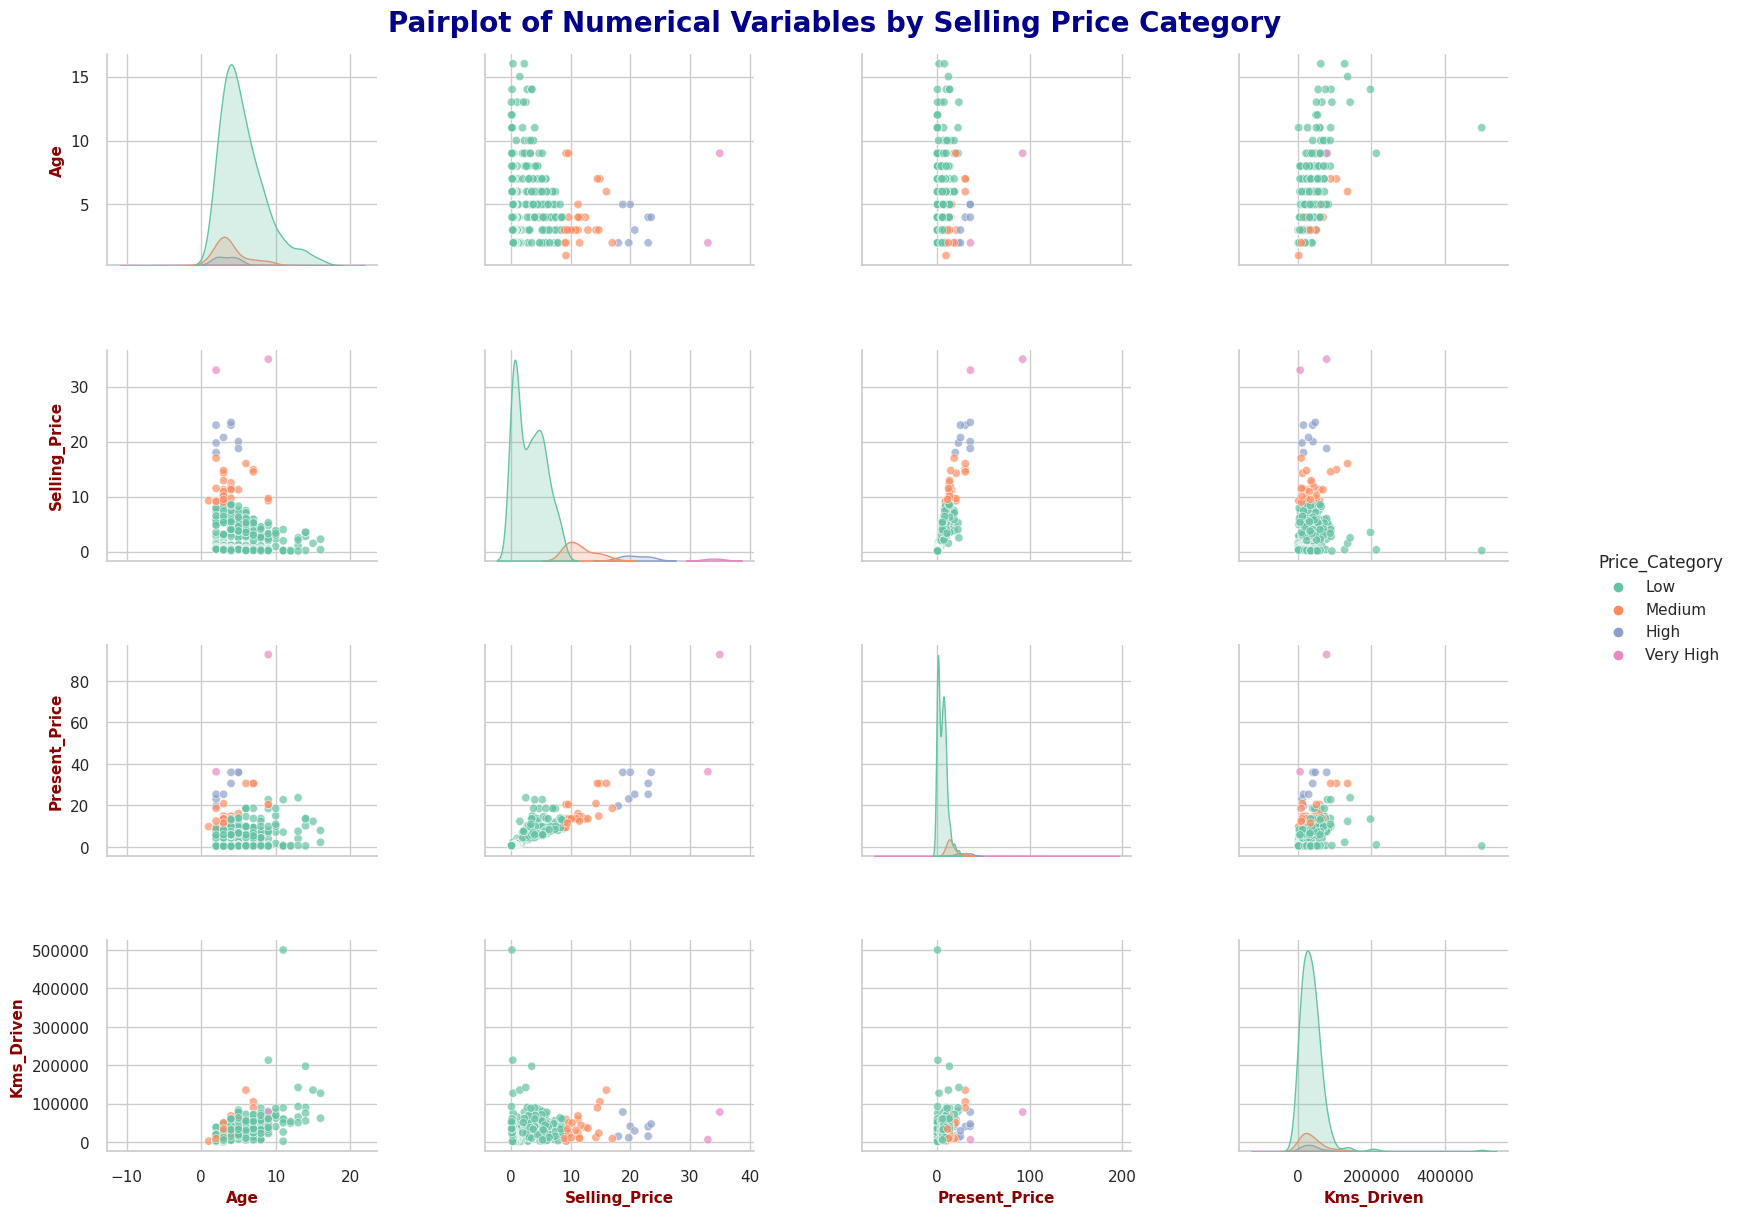

In [19]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create a new categorical variable for Selling_Price
df2['Price_Category'] = pd.cut(df2['Selling_Price'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Create a pairplot with hue based on the new categorical variable
pairplot = sns.pairplot(
    df2[['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Price_Category']],
    diag_kind='kde',
    hue='Price_Category', 
    palette='Set2',  
    markers='o',
    height=2.8
)

pairplot.fig.suptitle('Pairplot of Numerical Variables by Selling Price Category', y=1.02, fontsize=20, fontweight='bold', color='darkblue')

for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=11, fontweight='bold', color='darkred')
    ax.set_ylabel(ax.get_ylabel(), fontsize=11, fontweight='bold', color='darkred')

for ax in pairplot.axes.flatten():
    for collection in ax.collections: 
        collection.set_alpha(0.7)

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.gcf().set_size_inches(18, 12)  
plt.show()

### 📊 Analysis

#### 📅 Distribution of Age:
- The Age variable shows a right-skewed distribution, with most vehicles being relatively new (lower age values).
- There are few vehicles older than 10 years.

#### 💰 Selling Price Trends:
- Selling Price generally increases with Present Price and Kms Driven, suggesting that newer or less-driven vehicles tend to sell for higher prices.
- There are clusters indicating that vehicles with a Present Price of around 20 or below tend to sell for lower amounts.

#### 📈 Present Price Influence:
- The Present Price variable displays a positive correlation with Selling Price, indicating that as the Present Price of a vehicle increases, so does its Selling Price.

#### 🚗 Kms Driven:
- The relationship between Kms Driven and other variables indicates that vehicles that are driven less (lower values) generally have a higher selling price.
- The spread of points for Kms Driven is wider for higher selling prices, suggesting that vehicles with more kilometers driven can still command high selling prices, potentially due to other favorable attributes.

#### 💼 Price Categories:
- Different Price Categories are color-coded, allowing for quick visual identification of how various variables cluster by category.
- For example, vehicles in the Low Price category are mostly concentrated in the lower ranges of both Selling Price and Present Price, while Very High Price vehicles can span across higher ranges.

### 🔚 Conclusion
- The pairplot reveals clear relationships between the numerical variables of vehicles:
  - Age negatively impacts Selling Price, with newer vehicles generally fetching higher prices.
  - Selling Price is positively correlated with Present Price and inversely related to Kms Driven, indicating that less-driven, newer vehicles are valued higher.
  - The Price Categories effectively segment the data, showcasing that vehicles categorized as Very High Price often exhibit desirable attributes, despite some variability in kilometers driven.


# 

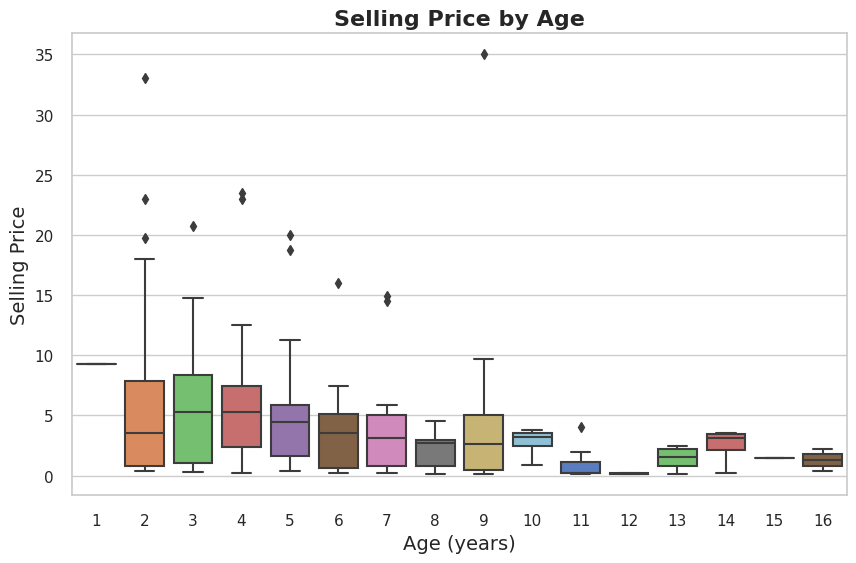

In [20]:
# Box Plot of Selling Price by Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Selling_Price', data=df2, palette='muted')
plt.title('Selling Price by Age', fontsize=16, fontweight='bold')
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)
plt.show()

### 📊 Selling Price by Age Analysis

In my **"Selling Price by Age"** box plot, the points above the box might appear to be outliers. However, based on previous analyses, we concluded that these points are not outliers but rather represent legitimate variations in selling prices for certain vehicle ages. 

Additionally, it’s evident that as the age of the vehicle increases, the selling price tends to decrease. This trend suggests that older cars generally have lower market values, reflecting **depreciation** over time. 


# 

## 🔄 Convert String to Float


In [21]:
df2['Fuel_Type'] = df2['Fuel_Type'].apply(lambda x: 3.0 if x == 'Petrol' 
                                          else (3.0 if x == 'Diesel'  else
                                               (4.0 if x == 'CNG' else x)))

In [22]:
df2['Seller_Type'] = df2['Seller_Type'].apply(lambda x: 2.0 if x == 'Dealer' else 
                                              (3.0 if x == 'Individual' else None))

In [23]:
df2['Transmission'] = df2['Transmission'].apply(lambda x: 2.0 if x == 'Manual' else
                                                (3.0 if x == 'Automatic' else None))

In [24]:
df3= pd.DataFrame(df2 , columns =[ 'Age',  'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Selling_Price'],)
df3

,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,5,5.59,27000,3.0,2.0,2.0,0,3.35
1,6,9.54,43000,3.0,2.0,2.0,0,4.75
2,2,9.85,6900,3.0,2.0,2.0,0,7.25
3,8,4.15,5200,3.0,2.0,2.0,0,2.85
4,5,6.87,42450,3.0,2.0,2.0,0,4.60
...,...,...,...,...,...,...,...,...
296,3,11.60,33988,3.0,2.0,2.0,0,9.50
297,4,5.90,60000,3.0,2.0,2.0,0,4.00
298,10,11.00,87934,3.0,2.0,2.0,0,3.35
299,2,12.50,9000,3.0,2.0,2.0,0,11.50


In [25]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,299.0,5.384615,2.896868,1.00,3.00,5.00,7.00,16.0
Present_Price,299.0,7.541037,8.567887,0.32,1.20,6.10,9.84,92.6
Kms_Driven,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0
Fuel_Type,299.0,3.006689,0.081649,3.00,3.00,3.00,3.00,4.0
Seller_Type,299.0,2.354515,0.479168,2.00,2.00,2.00,3.00,3.0
Transmission,299.0,2.130435,0.337346,2.00,2.00,2.00,2.00,3.0
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0
Selling_Price,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0


#### 🚗 Car Analysis Summary 🚗

**Age**
- **Mean:** The average age of the cars is **5.38 years**.
- **Range:** The ages range from **1 to 16 years**.

**Present Price**
- **Mean:** The average current price of the cars is **7.54**.
- **Range:** Current prices vary from **0.32 to 92.6**, indicating that some cars are quite expensive.

**Kms Driven**
- **Mean:** On average, cars have been driven **38,016.75 kilometers**.
- **Range:** Driven distances vary from **500 kilometers** to **600,000 kilometers**.

**Fuel Type**
- **Mean:** The average value of **1.24** suggests most cars run on petrol or diesel.
- **Range:** Values range from **1 to 4** (four fuel types).

**Seller Type**
- **Mean:** The average value of **1.35** suggests two seller types (individuals and dealerships).
- **Range:** Between **1 and 2**.

**Transmission**
- **Mean:** The average value of **1.13** suggests most cars have one transmission type.
- **Range:** Between **1 and 2**.

**Owner**
- **Mean:** The average number of previous owners is **0.43**.
- **Range:** From **0 to 3**.

**Selling Price**
- **Mean:** The average selling price is **4.59**.
- **Range:** Selling prices range from **0.1 to 35**.


# 

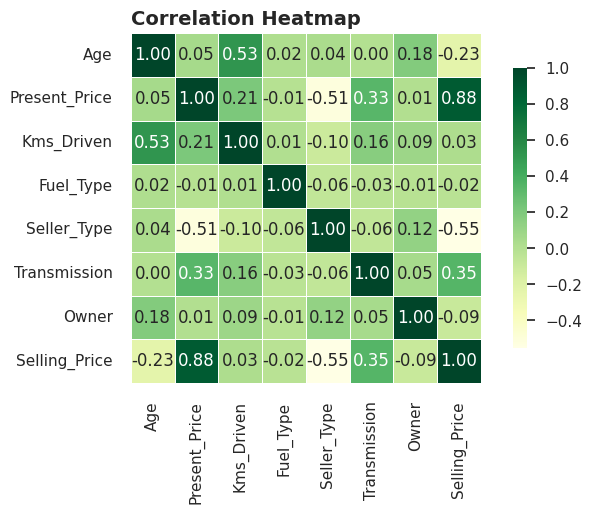

In [26]:
plt.figure(figsize=(8, 5))

# Select only numerical columns for correlation
numerical_cols = df3.select_dtypes(include=['int64', 'float64']).columns
corr = df2[numerical_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlGn', square=True, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap', fontsize=14, fontweight='bold', loc='left')  
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.2)  
plt.show()


#### 🔝 Ranking of Factors Affecting Selling Price

    The hierarchy of factors influencing the selling price of cars is as follows:


1. **💰 Present Price** 
   - The most significant factor affecting selling price.
   
2. **🏪 Seller Type** 
   - Indicates whether the seller is an individual or a dealership.
   
3. **⛽ Fuel Type** 
   - Influences demand and consumer preferences.
   
4. **⚙️ Transmission** 
   - Affects buyer decisions, though minimally.
   
5. **📅 Age** 
   - Older cars generally have a lower selling price due to depreciation.
   
6. **👤 Owner** 
   - The number of previous owners can affect desirability.
   
7. **🛣️ Kms Driven** 
   - While mileage is a factor, it is less impactful than the others listed.

# 

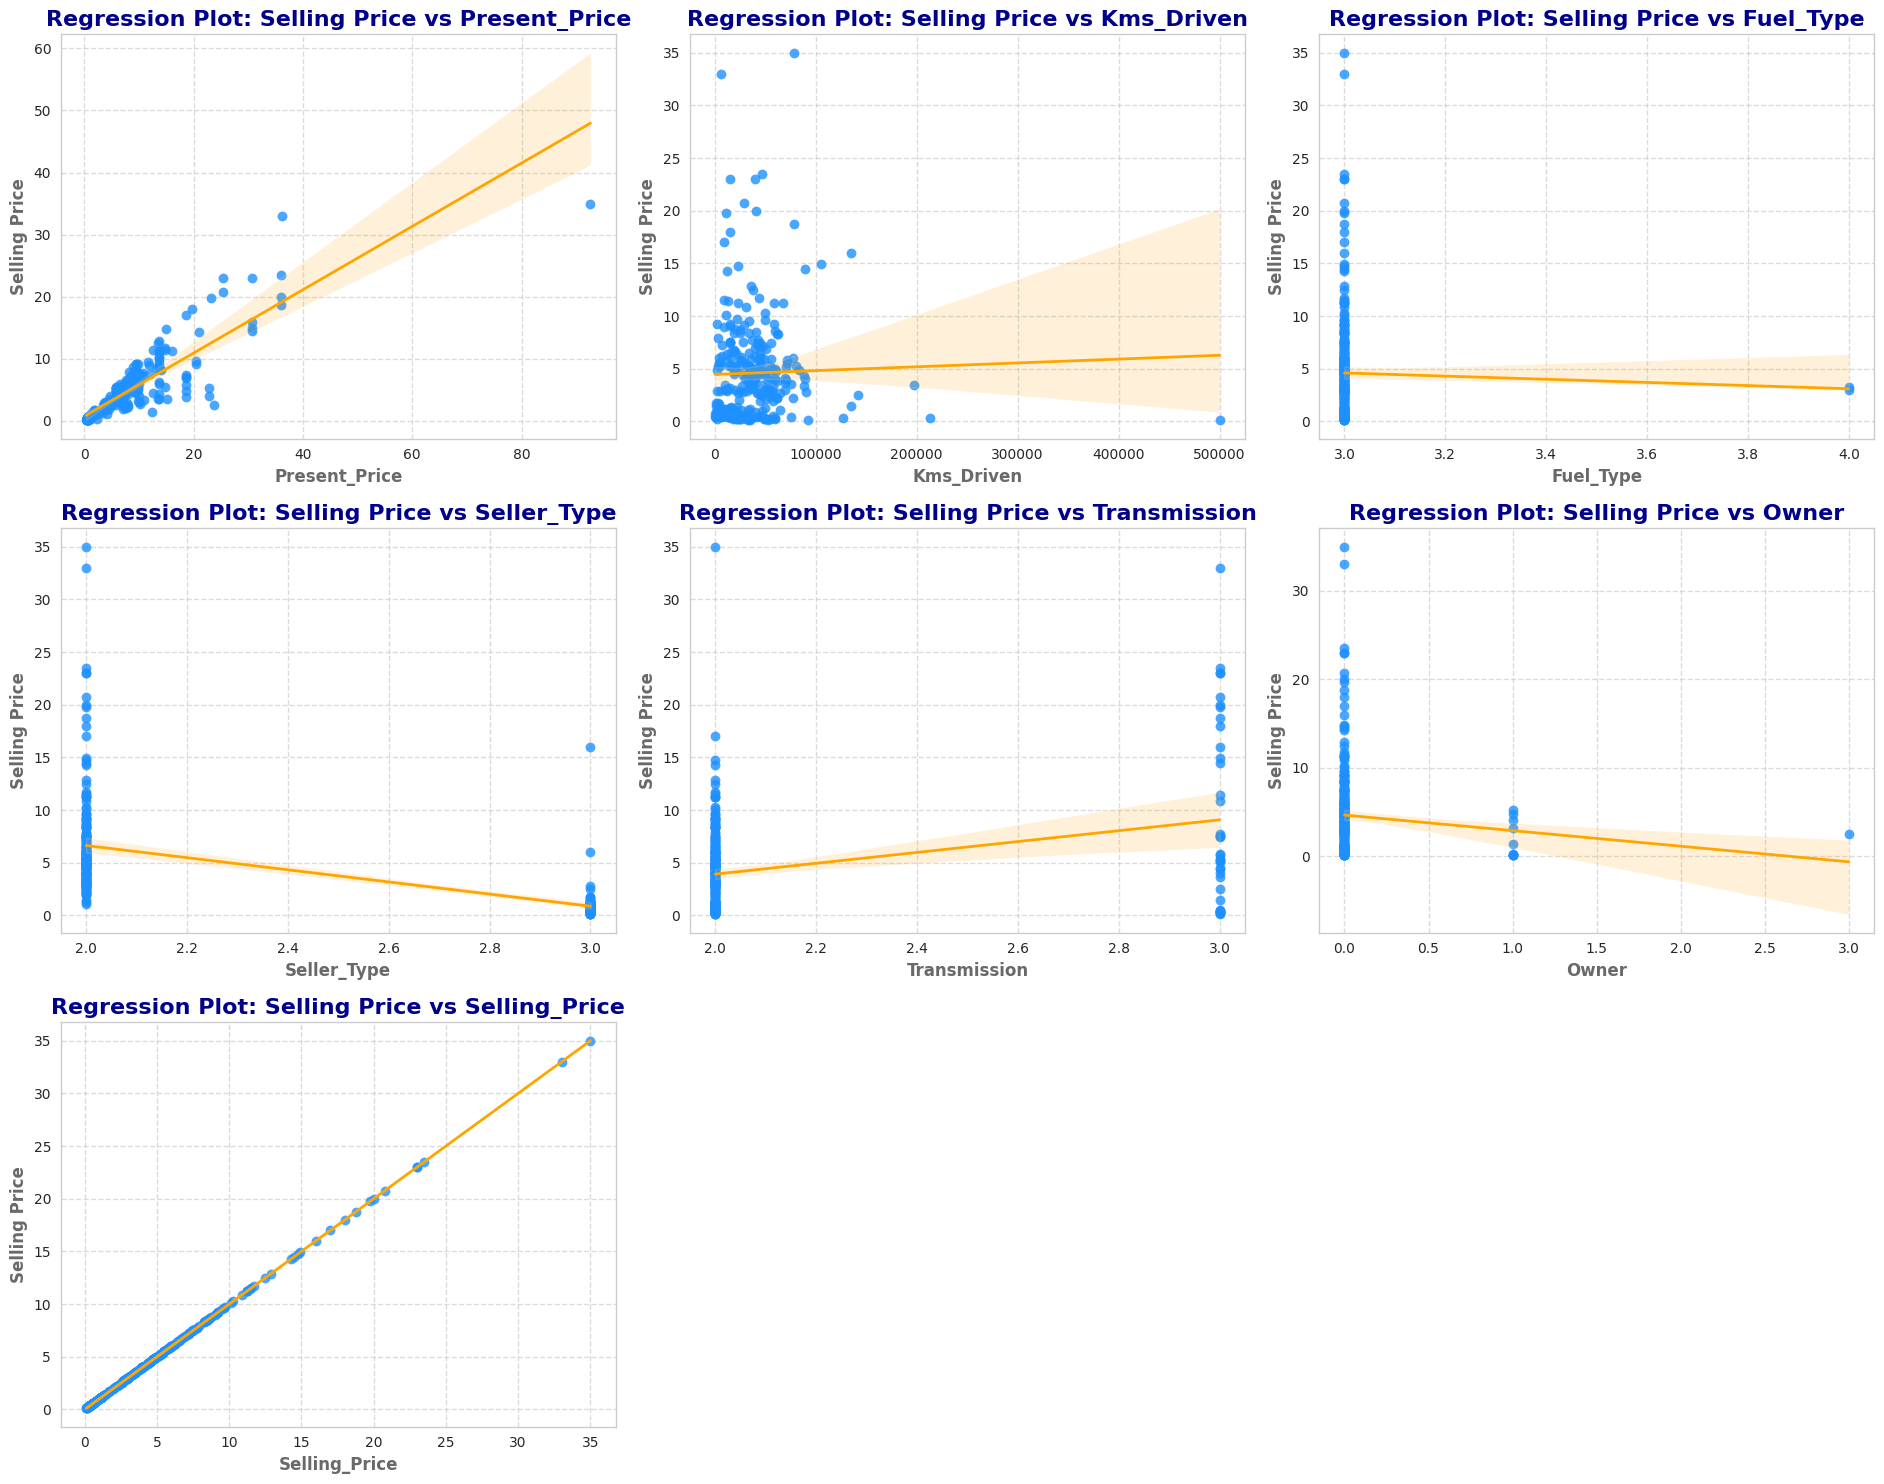

In [27]:
plt.style.use('seaborn-whitegrid')
num_cols = 3  # Number of plots per row
num_plots = len(df3.columns[1:])
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed
# Adjusted figure size for better visibility
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()
for i, col in enumerate(df3.columns[1:]):
    sns.regplot(x=df3[col], y=df3.Selling_Price, 
                scatter_kws={'color': 'dodgerblue', 's': 50},  
                line_kws={'color': 'orange', 'lw': 2},  
                marker='o', ax=axes[i])  
    axes[i].set_title(f'Regression Plot: Selling Price vs {col}', fontsize=16, fontweight='bold', color='darkblue')
    axes[i].set_xlabel(col, fontsize=12, fontweight='bold', color='dimgray')  
    axes[i].set_ylabel('Selling Price', fontsize=12, fontweight='bold', color='dimgray')  
    axes[i].tick_params(axis='both', labelsize=10)  
    axes[i].grid(True, linestyle='--', alpha=0.7)  

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])
plt.tight_layout(rect=[0.05, 0, 1, 1]) 
plt.show()

### 🚗 Selling Price vs. Selling Price
**Observation:** The regression line is nearly perfect with a slope close to 1, indicating that the selling price closely correlates with itself. This is expected as we are comparing the same variable.  
**Implication:** This plot serves as a baseline for understanding how other variables might influence the selling price.

### 💰 Selling Price vs. Present Price
**Observation:** The regression plot shows a strong positive relationship, indicating that as the present price of the car increases, the selling price also tends to increase.  
**Implication:** This suggests that buyers are willing to pay more for cars that have a higher present price, likely due to perceived value or quality.

### 🛣️ Selling Price vs. Kms Driven
**Observation:** The plot shows a somewhat scattered relationship, with a slight downward trend as the kilometers driven increase.  
**Implication:** This could imply that higher mileage negatively affects the selling price, as cars with more kilometers are often seen as less desirable.

### ⛽ Selling Price vs. Fuel Type
**Observation:** There is a gradual upward trend with some variation. Cars using petrol (or perhaps a specific fuel type) tend to have a higher selling price.  
**Implication:** Fuel type may influence demand and, consequently, the price consumers are willing to pay, potentially due to factors like fuel economy or market preferences.

### 🏪 Selling Price vs. Seller Type
**Observation:** The regression line is relatively flat, suggesting that the selling price does not significantly vary based on whether the seller is an individual or a dealership.  
**Implication:** This may indicate that the seller type has a negligible impact on the perceived value of the car, with other factors being more influential.

### ⚙️ Selling Price vs. Transmission
**Observation:** Similar to the seller type, the regression line here is also flat, showing little to no change in selling price with different transmission types.  
**Implication:** This suggests that transmission type may not be a major factor for buyers when determining the price they are willing to pay.

### 👤 Selling Price vs. Owner
**Observation:** The regression plot shows that the selling price decreases slightly as the number of previous owners increases. However, the relationship is quite weak.  
**Implication:** This may indicate that cars with fewer previous owners are generally more desirable, but the effect is not strong enough to significantly influence the selling price.

## 🔍 Conclusion
Overall, the regression plots suggest that the present price is a strong predictor of selling price, while factors such as kms driven, fuel type, and previous owners also play a role, albeit to a lesser extent. Seller type and transmission appear to have little effect on the selling price, indicating that buyers may prioritize other factors when making a purchase decision.


# 

## 🛠️ Create Model

## 🔄 Normalize

<br>
Normalization is an essential preprocessing step to ensure that the features contribute equally to the model's performance. It adjusts the range of the data to a common scale, typically between 0 and 1. This process is particularly important for algorithms sensitive to the scale of the input features, such as K-means clustering or gradient descent-based methods.

#### Steps for Normalization:

1. **Select Features:** Identify the features that need to be normalized.
2. **Apply Normalization:** Use techniques such as Min-Max scaling or Z-score standardization.
3. **Transform Data:** Adjust the feature values accordingly.


In [28]:
# 1. Initialize MinMaxScaler with the desired range
scaler = MinMaxScaler(feature_range=(1, 4))

# 2. Select specific columns to normalize
features_to_normalize = ['Present_Price', 'Kms_Driven', 'Age']

# 3. Normalize the selected features
normalized_data = scaler.fit_transform(df3[features_to_normalize])

# 4. Create a DataFrame from the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=features_to_normalize)

# 5. Concatenate normalized features with non-normalized columns
additional_columns = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Selling_Price']

# Ensure the number of rows in the original and additional columns are the same
if df3.shape[0] == df3[additional_columns].shape[0]:
    final_df = pd.concat([normalized_df, df3[additional_columns].reset_index(drop=True)], axis=1)
else:
    print("Mismatch in the number of rows between the DataFrames.")
final_df

,Present_Price,Kms_Driven,Age,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,1.171326,1.159159,1.8,3.0,2.0,2.0,0,3.35
1,1.299740,1.255255,2.0,3.0,2.0,2.0,0,4.75
2,1.309818,1.038438,1.2,3.0,2.0,2.0,0,7.25
3,1.124512,1.028228,2.4,3.0,2.0,2.0,0,2.85
4,1.212939,1.251952,1.8,3.0,2.0,2.0,0,4.60
...,...,...,...,...,...,...,...,...
294,1.366710,1.201129,1.4,3.0,2.0,2.0,0,9.50
295,1.181404,1.357357,1.6,3.0,2.0,2.0,0,4.00
296,1.347204,1.525129,2.8,3.0,2.0,2.0,0,3.35
297,1.395969,1.051051,1.2,3.0,2.0,2.0,0,11.50


In [29]:
#spilitting data and target
x= final_df.drop (['Selling_Price'], axis=1)
y=final_df['Selling_Price']

In [30]:
# spilitting training and test data
#80 -20 #train =80, test=20
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size= 0.2, random_state=1)
model=LinearRegression()
model.fit(x_train,y_train)
LinearRegression()

LinearRegression()

In [31]:
y_pred= model.predict(x_test)
#y_pred

In [32]:
print (model.intercept_)
print (model.coef_)

-8.921867055992438
[17.59297243 -0.58679215 -2.23491303 -0.81770594 -0.52392252  0.23354256
 -1.04538825]


In [33]:
compare= pd.DataFrame({'Actual': y_test, 'predict': y_pred})
compare

,Actual,predict
173,0.38,-0.832740
287,10.11,9.480028
51,18.00,13.675275
146,0.52,-1.086486
214,2.90,4.229952
197,0.12,-2.661528
274,8.65,8.984340
62,23.50,21.928293
27,1.95,1.160599
201,2.95,1.947915


In [34]:
#Error evaluation
print ('Mean Absolute Error:' , metrics.mean_absolute_error (y_test, y_pred))
print ('Mean Squard Error:' , metrics.mean_squared_error (y_test, y_pred))
print ('Root Mean Squard Error:' , np.sqrt (metrics.mean_squared_error (y_test, y_pred)))
print ('R2 Score:' ,metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.2436457155514682
Mean Squard Error: 6.365459002714115
Root Mean Squard Error: 2.5229861281255817
R2 Score: 0.8398957949666653


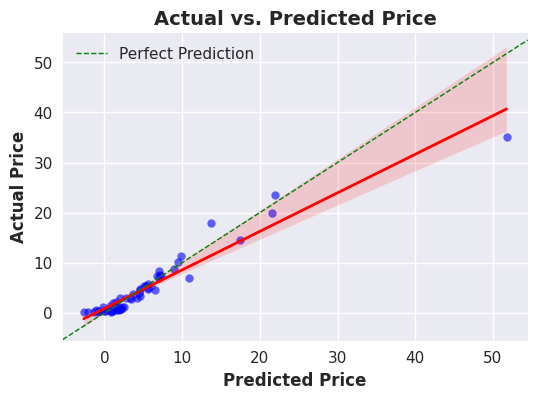

In [35]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(6, 4))
sns.regplot(x=y_pred, y=y_test, scatter_kws={'color': 'blue', 'alpha': 0.6},
            line_kws={'color': 'red', 'linewidth': 2})
plt.xlabel('Predicted Price', fontsize=12, fontweight='bold')
plt.ylabel('Actual Price', fontsize=12, fontweight='bold')
plt.title('Actual vs. Predicted Price', fontsize=14, fontweight='bold')
plt.axline((0, 0), slope=1, color='green', linestyle='--', linewidth=1, label='Perfect Prediction')
plt.legend()
plt.grid(True)
plt.show()

### 🚗 Price Prediction Analysis

**This plot shows the comparison between the** **actual** **and** **predicted prices** **of cars.**  
The x-axis represents the predicted prices, while the y-axis shows the actual prices. Ideally, all data points would fall along the diagonal **"Perfect Prediction"** line, meaning the predicted prices match the actual prices exactly.

However, the scattered blue dots represent actual data points, and they don't all lie on the diagonal line. The red line in the middle represents the trend of the predictions, with the shaded region showing the uncertainty or error margin. The closer the dots are to the diagonal line, the more accurate the predictions are. 🤞

**In general, the model seems to perform well for lower prices but becomes less accurate for higher prices, as seen in the dots further away from the perfect prediction line at higher values.** 📈


# 

## 📏 Dimension


In this section, we will explore the concept of dimensions in data analysis. 

#### Importance of Dimensions:

- **Feature Representation:** Dimensions represent the number of features used in the dataset. Each feature adds a new dimension to the data space. 📊
- **Model Complexity:** Higher dimensions can potentially improve model accuracy but may also lead to overfitting if not managed properly. ⚖️
- **Curse of Dimensionality:** As the number of dimensions increases, the volume of the space increases, making the data sparse and harder to analyze. ❗

In [36]:
def check(final_df, target_column, test_size):
    # Initial R² score
    r2 = 0.84 
    
    # Extract features and target variable
    X = final_df.drop(columns=[target_column])
    Y = final_df[target_column]

    X_updated = X.copy()

    # Only for dimension 2
    dimension = 2
    added_columns = []  
    
    for column in X.columns:  
        New_Col_Name = f"{column}^{dimension}"  
        New_Col_val = X[column] ** dimension  

        X_updated[New_Col_Name] = New_Col_val  

        X_train, X_test, y_train, y_test = train_test_split(X_updated, Y, test_size=test_size, random_state=1)

        new_model = LinearRegression()
        new_model.fit(X_train, y_train)

        y_pred = new_model.predict(X_test)

        r2_new = metrics.r2_score(y_test, y_pred)

        if r2_new < r2:
            print(f"Dropped: {New_Col_Name}, R2 decreased: {r2_new:.4f}")
            # Remove the column if dropped
            X_updated.drop(columns=[New_Col_Name], inplace=True)
        else:
            r2 = r2_new
            added_columns.append(New_Col_Name)  
            print(f"Added: {New_Col_Name}, R2 improved: {r2:.4f}")

    print("Final R2 Score: ", r2)
    final_df_updated = final_df.copy()  
    final_df_updated = pd.concat([final_df_updated, X_updated[added_columns]], axis=1)  

    return final_df_updated
final_df_updated = check(final_df, 'Selling_Price', 0.2)

Dropped: Present_Price^2, R2 decreased: -0.4695
Dropped: Kms_Driven^2, R2 decreased: 0.7999
Added: Age^2, R2 improved: 0.8443
Added: Fuel_Type^2, R2 improved: 0.8443
Added: Seller_Type^2, R2 improved: 0.8443
Dropped: Transmission^2, R2 decreased: 0.8443
Dropped: Owner^2, R2 decreased: 0.8284
Final R2 Score:  0.8442584645046348


#### 🎉 Accuracy Improvement!


#### 📈 Higher Dimension Analysis


Adding a second dimension increased the score by approximately **6%**. However, higher dimensions did not change the score. ⚖️



# 

## 🔗 Dot Product Features
The dot product is a fundamental operation in linear algebra that can be used to measure the similarity between two feature vectors. In this section, we will explore how to create dot product features and their significance.

#### Why Use Dot Product Features?

- **Similarity Measurement:** The dot product allows us to quantify how similar two vectors are. A higher dot product indicates a greater similarity.
- **Feature Interaction:** Dot products can capture interactions between features, allowing models to learn complex relationships in the data.

#### Creating Dot Product Features:

1. **Selecting Features:** Identify pairs of features that you want to combine using the dot product.
2. **Calculating the Dot Product:** Use the following formula to calculate the dot product of two vectors

3. **Adding to the Dataset:** Include the resulting dot product as a new feature in your dataset.



In [37]:
# Create interaction features only with important variables
final_df_updated['Present_Kms'] = final_df_updated['Present_Price'] * final_df_updated['Kms_Driven']
final_df_updated['Present_Fuel'] = final_df_updated['Present_Price'] * final_df_updated['Fuel_Type']
final_df_updated['Present_Owner'] = final_df_updated['Present_Price'] * final_df_updated['Owner']
final_df_updated['Kms_Fuel'] = final_df_updated['Kms_Driven'] * final_df_updated['Fuel_Type']
final_df_updated['Kms_Owner'] = final_df_updated['Kms_Driven'] * final_df_updated['Owner']
final_df_updated['Fuel_Owner'] = final_df_updated['Fuel_Type'] * final_df_updated['Owner']

In [38]:
# Split data for training
X = final_df_updated.drop(columns=['Selling_Price'])
y = final_df_updated['Selling_Price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the model
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [39]:
# Predictions
y_pred = model2.predict(x_test)
r2 = metrics.r2_score(y_test , y_pred)

In [40]:
#Error evaluation
print ('Mean Absolute Error:' , metrics.mean_absolute_error (y_test, y_pred))
print ('Mean Squard Error:' , metrics.mean_squared_error (y_test, y_pred))
print ('Root Mean Squard Error:' , np.sqrt (metrics.mean_squared_error (y_test, y_pred)))
print ('R2 Score:' ,metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.019705997374276
Mean Squard Error: 3.745551303091139
Root Mean Squard Error: 1.9353426836328338
R2 Score: 0.9057917875934343


#### 🎉 Accuracy Improvement!


We have achieved a significant milestone in our analysis! The accuracy has increased by **0.6**, which is a remarkable improvement. This enhancement indicates that our model is performing better and capturing the underlying patterns in the data more effectively.



# 

## 📊 K-Fold Cross-Validation
K-Fold Cross-Validation is a powerful technique used to assess the performance of a machine learning model. It involves splitting the dataset into \( k \) subsets, or "folds," allowing the model to be trained and evaluated multiple times.

#### Why Use K-Fold Cross-Validation?

- **Model Evaluation:** It provides a better estimation of model performance by reducing the variance associated with a single train/test split.
- **Utilization of Data:** Every data point gets to be in both training and testing sets, ensuring that the model is evaluated on different subsets of the data.

#### How K-Fold Works:

1. **Split the Data:** Divide the dataset into \( k \) equal (or nearly equal) folds.
2. **Training and Validation:** For each fold:
   - Use the current fold as the test set.
   - Use the remaining \( k-1 \) folds as the training set.
3. **Model Evaluation:** Record the performance metric (e.g., accuracy, F1-score) for each iteration.
4. **Average Performance:** Calculate the average of the performance metrics to get a more reliable estimate.



In [41]:
k_fold = KFold(5)
result = (cross_val_score(model,x,y,cv=k_fold , n_jobs=1))
print(result)
print(np.mean(result))

[   0.86400382    0.74540304 -105.15228588    0.6163951     0.82051194]
-20.42119439595689


In [42]:
final_df_updated

,Present_Price,Kms_Driven,Age,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price,Age^2,Fuel_Type^2,Seller_Type^2,Present_Kms,Present_Fuel,Present_Owner,Kms_Fuel,Kms_Owner,Fuel_Owner
0,1.171326,1.159159,1.8,3.0,2.0,2.0,0,3.35,3.24,9.0,4.0,1.357754,3.513979,0.0,3.477477,0.0,0.0
1,1.299740,1.255255,2.0,3.0,2.0,2.0,0,4.75,4.00,9.0,4.0,1.631505,3.899220,0.0,3.765766,0.0,0.0
2,1.309818,1.038438,1.2,3.0,2.0,2.0,0,7.25,1.44,9.0,4.0,1.360165,3.929454,0.0,3.115315,0.0,0.0
3,1.124512,1.028228,2.4,3.0,2.0,2.0,0,2.85,5.76,9.0,4.0,1.156255,3.373537,0.0,3.084685,0.0,0.0
4,1.212939,1.251952,1.8,3.0,2.0,2.0,0,4.60,3.24,9.0,4.0,1.518541,3.638817,0.0,3.755856,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.366710,1.201129,1.4,3.0,2.0,2.0,0,9.50,1.96,9.0,4.0,1.641595,4.100130,0.0,3.603387,0.0,0.0
295,1.181404,1.357357,1.6,3.0,2.0,2.0,0,4.00,2.56,9.0,4.0,1.603588,3.544213,0.0,4.072072,0.0,0.0
296,1.347204,1.525129,2.8,3.0,2.0,2.0,0,3.35,7.84,9.0,4.0,2.054660,4.041612,0.0,4.575387,0.0,0.0
297,1.395969,1.051051,1.2,3.0,2.0,2.0,0,11.50,1.44,9.0,4.0,1.467234,4.187906,0.0,3.153153,0.0,0.0


In [43]:
x1 = final_df_updated.copy() 
if "Selling_Price" in x1.columns:
    x1.drop(columns=["Selling_Price"], inplace=True)
x1.insert(0, "Selling_Price", final_df_updated['Selling_Price'])
x1 = x1[x1.index < 119]
x2 = x1[x1.index > 179]
x1.reset_index(drop=True, inplace=True)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
x = x1.drop(["Selling_Price"], axis=True)
y = x1['Selling_Price'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

common_columns = x_train.columns.intersection(x_test.columns)
x_train = x_train[common_columns]
x_test = x_test[common_columns]

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 1.7190168825717949
Mean Squared Error: 4.6290398611324735
Root Mean Squared Error: 2.151520360380648
R2 Score: 0.9247591597872546


#### 🎉 Accuracy Improvement!



We have achieved a significant milestone in our analysis! The accuracy has increased to **0.92**, which is an outstanding improvement. This enhancement indicates that our model is performing exceptionally well and capturing the underlying patterns in the data more effectively.

### Key Takeaways:
- Improved accuracy reflects better predictions and reliability.
- Continuous refinement of the model can lead to even greater performance.
- It's essential to monitor accuracy as we introduce new features or data.

Let’s keep up the momentum and strive for even better results! 🚀



# 

In [45]:
compare = pd.DataFrame({'Actual ' : y_test.flatten() , 'Prediction ' : y_pred.flatten()})
compare

,Actual,Prediction
0,7.75,9.995316
1,20.75,18.086329
2,17.00,14.353644
3,8.75,7.037747
4,9.65,8.478075
5,2.50,2.633932
6,6.50,6.048260
7,2.85,4.303935
8,2.65,3.096969
9,3.80,6.821524


In [46]:
Df = x_test
Df.insert(0 , "y_pred" , y_pred)
Df.insert(0,"y_test",y_test)
Df

,y_test,y_pred,Present_Price,Kms_Driven,Age,Fuel_Type,Seller_Type,Transmission,Owner,Age^2,Fuel_Type^2,Seller_Type^2,Present_Kms,Present_Fuel,Present_Owner,Kms_Fuel,Kms_Owner,Fuel_Owner
48,7.75,9.995316,1.291612,1.219219,1.2,3.0,2.0,3.0,0,1.44,9.0,4.0,1.574759,3.874837,0.0,3.657658,0.0,0.0
94,20.75,18.086329,1.815020,1.171171,1.4,3.0,2.0,3.0,0,1.96,9.0,4.0,2.125699,5.445059,0.0,3.513514,0.0,0.0
95,17.00,14.353644,1.595579,1.049249,1.2,3.0,2.0,2.0,0,1.44,9.0,4.0,1.674160,4.786736,0.0,3.147748,0.0,0.0
8,8.75,7.037747,1.278609,1.118757,1.4,3.0,2.0,2.0,0,1.96,9.0,4.0,1.430452,3.835826,0.0,3.356270,0.0,0.0
97,9.65,8.478075,1.654421,1.297441,2.6,3.0,2.0,2.0,0,6.76,9.0,4.0,2.146515,4.963264,0.0,3.892324,0.0,0.0
22,2.50,2.633932,1.102081,1.268949,1.8,3.0,2.0,2.0,0,3.24,9.0,4.0,1.398484,3.306242,0.0,3.806847,0.0,0.0
7,6.50,6.048260,1.269506,1.197772,1.6,3.0,2.0,2.0,0,2.56,9.0,4.0,1.520578,3.808518,0.0,3.593315,0.0,0.0
10,2.85,4.303935,1.106632,1.009820,1.2,3.0,2.0,2.0,0,1.44,9.0,4.0,1.117499,3.319896,0.0,3.029459,0.0,0.0
45,2.65,3.096969,1.148570,1.384577,2.0,3.0,2.0,2.0,0,4.00,9.0,4.0,1.590283,3.445709,0.0,4.153730,0.0,0.0
89,3.80,6.821524,1.594603,1.369369,2.8,3.0,2.0,2.0,0,7.84,9.0,4.0,2.183601,4.783810,0.0,4.108108,0.0,0.0


# 

## 📊 Visualization of Model


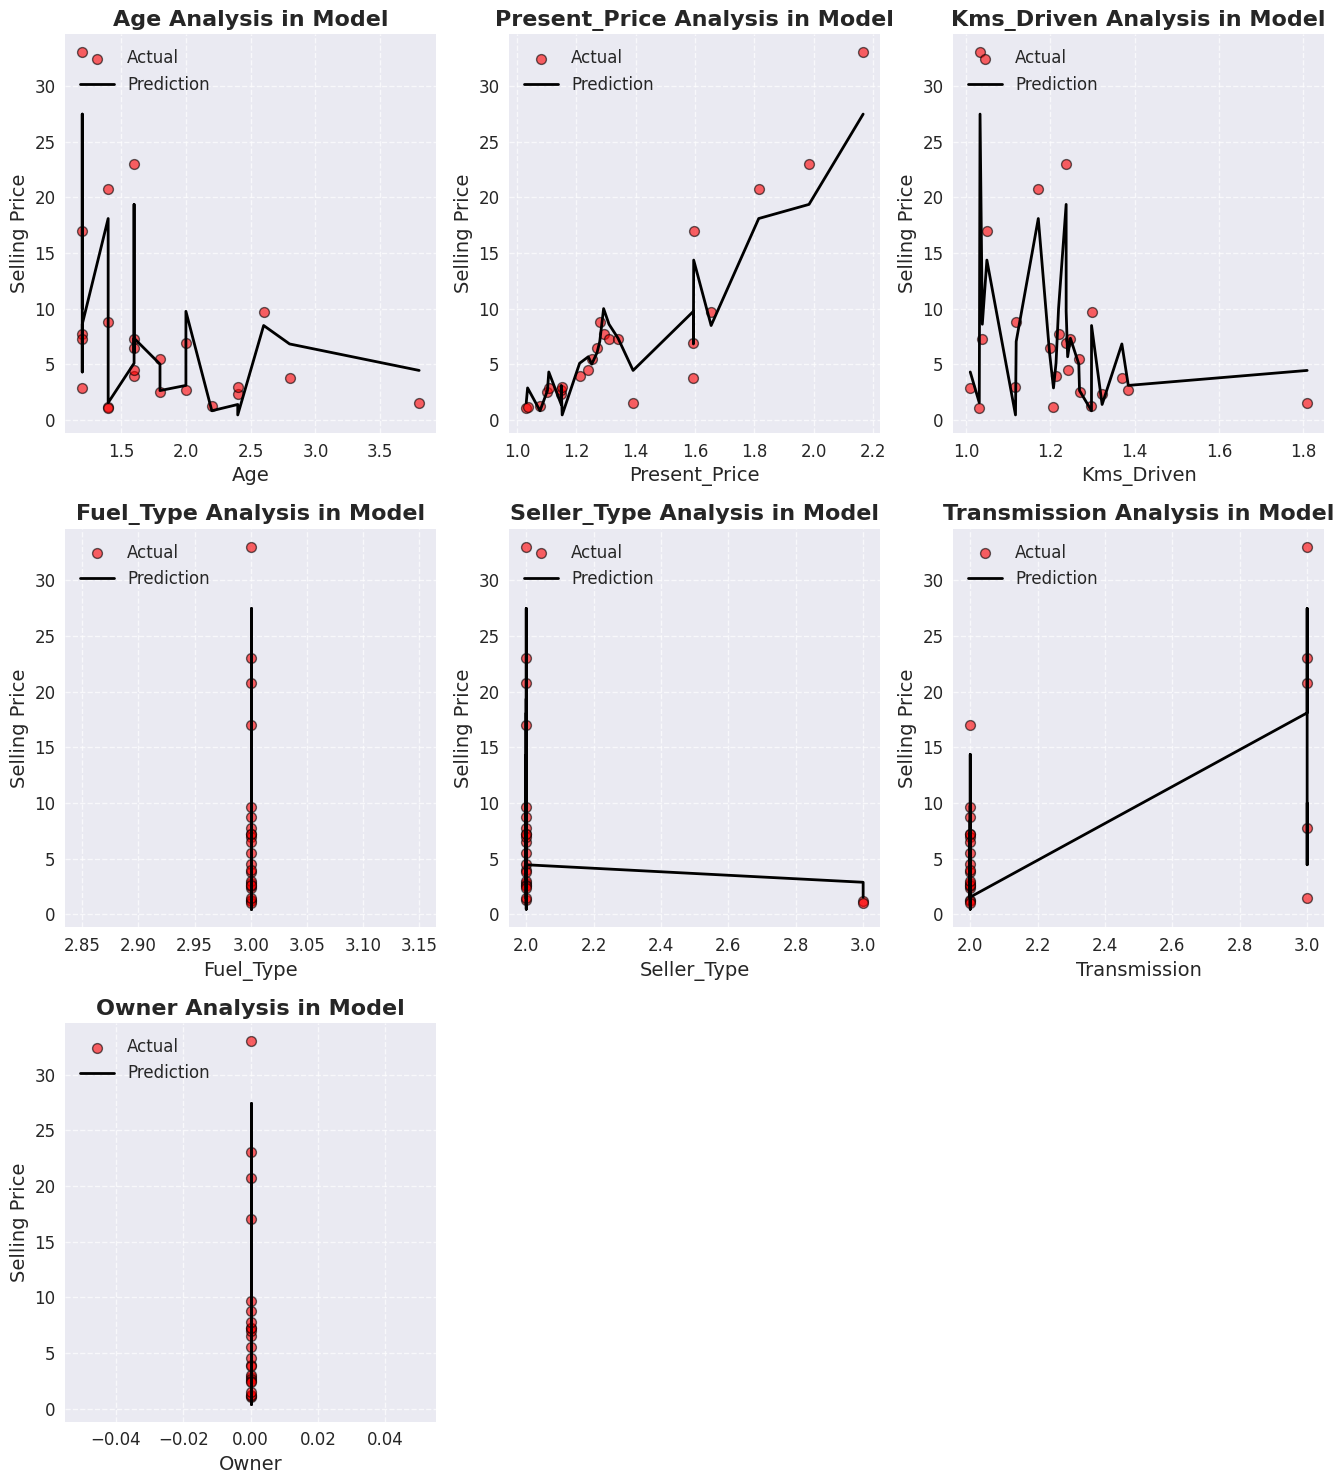

In [47]:
features = ["Age", "Present_Price", "Kms_Driven", "Fuel_Type", "Seller_Type", "Transmission", "Owner"]
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5)) 
axes = axes.flatten() 

for i, feature in enumerate(features):
    Df = Df.sort_values(by=[feature])
    
    axes[i].scatter(Df[feature], Df.y_test, label="Actual", color="red", alpha=0.6, edgecolor='black', s=50)
    axes[i].plot(Df[feature], Df.y_pred, label="Prediction", color="black", linewidth=2)
    axes[i].set_title(f"{feature} Analysis in Model", fontsize=16, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=14)
    axes[i].set_ylabel('Selling Price', fontsize=14)
    axes[i].tick_params(axis='both', labelsize=12)  
    axes[i].legend(fontsize=12, loc='upper left')
    axes[i].grid(True, linestyle='--', alpha=0.7)

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0.1, 0, 1, 1]) 
plt.show()

#### 📊 Regression Analysis of Selling Prices

The visual provided shows various regression plots comparing actual versus predicted selling prices of vehicles based on different features. Here's a concise and professional analysis:

1. **Age Analysis**: As vehicle age increases, the selling price tends to decrease with some fluctuations, indicating a non-linear relationship. The model seems to capture this trend well, though some deviation exists at certain points.

2. **Present Price Analysis**: There’s a positive relationship between the present price and selling price. The predicted prices follow the actual values closely, but the model slightly underestimates for higher present price points.

3. **Kms Driven Analysis**: The relationship between kilometers driven and selling price is scattered and less predictable. While the model attempts to capture the trend, it struggles with significant variance in actual selling prices.

4. **Fuel Type Analysis**: The model shows minimal impact of fuel type on selling price, with a flat prediction line and closely aligned actual data points, indicating a weak or negligible effect of this feature.

5. **Seller Type Analysis**: There is a noticeable difference in selling price based on seller type, with the model effectively capturing this dichotomy.

6. **Transmission Analysis**: The model identifies a clear distinction between transmission types, where manual vehicles tend to have a lower selling price. Predictions align closely with actual values.

7. **Owner Analysis**: The number of owners seems to have a minimal effect on the selling price. The model’s flat prediction line indicates that this feature might not significantly influence the target variable.

#### Conclusion

Overall, the model performs reasonably well across different features, though it could benefit from improvement in handling the variance seen in "Kms Driven" and high-value vehicles in the "Present Price" feature.



# 

In [48]:
x1

,Selling_Price,Present_Price,Kms_Driven,Age,Fuel_Type,Seller_Type,Transmission,Owner,Age^2,Fuel_Type^2,Seller_Type^2,Present_Kms,Present_Fuel,Present_Owner,Kms_Fuel,Kms_Owner,Fuel_Owner
0,3.35,1.171326,1.159159,1.8,3.0,2.0,2.0,0,3.24,9.0,4.0,1.357754,3.513979,0.0,3.477477,0.0,0.0
1,4.75,1.299740,1.255255,2.0,3.0,2.0,2.0,0,4.00,9.0,4.0,1.631505,3.899220,0.0,3.765766,0.0,0.0
2,7.25,1.309818,1.038438,1.2,3.0,2.0,2.0,0,1.44,9.0,4.0,1.360165,3.929454,0.0,3.115315,0.0,0.0
3,2.85,1.124512,1.028228,2.4,3.0,2.0,2.0,0,5.76,9.0,4.0,1.156255,3.373537,0.0,3.084685,0.0,0.0
4,4.60,1.212939,1.251952,1.8,3.0,2.0,2.0,0,3.24,9.0,4.0,1.518541,3.638817,0.0,3.755856,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,1.10,1.037386,1.195195,2.0,3.0,3.0,2.0,0,4.00,9.0,9.0,1.239879,3.112159,0.0,3.585586,0.0,0.0
115,1.10,1.051365,1.081081,1.6,3.0,3.0,2.0,0,2.56,9.0,9.0,1.136611,3.154096,0.0,3.243243,0.0,0.0
116,1.10,1.037386,1.153153,1.6,3.0,3.0,2.0,0,2.56,9.0,9.0,1.196265,3.112159,0.0,3.459459,0.0,0.0
117,1.05,1.051365,1.029429,2.0,3.0,3.0,2.0,0,4.00,9.0,9.0,1.082306,3.154096,0.0,3.088288,0.0,0.0


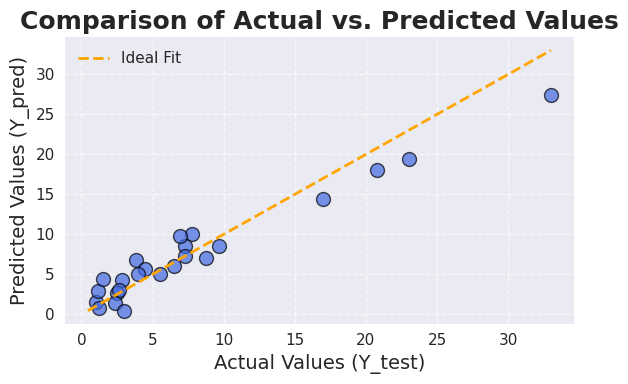

In [49]:
plt.figure(figsize=(6, 4)) 
plt.grid(True, linestyle='--', alpha=0.7)

plt.scatter(y_test, y_pred, color='royalblue', alpha=0.7, edgecolor='black', s=100)

plt.title("Comparison of Actual vs. Predicted Values", fontsize=18, fontweight='bold')
plt.xlabel("Actual Values (Y_test)", fontsize=14)
plt.ylabel('Predicted Values (Y_pred)', fontsize=14)

max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='orange', linewidth=2, linestyle='--', label='Ideal Fit')
plt.legend(fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout() 
plt.show()

#### 📊 Actual vs. Predicted Values



This chart compares **actual values** (Y_test) with **predicted values** (Y_pred). The **horizontal axis** represents actual values, while the **vertical axis** displays predicted values. The **dashed yellow line** indicates the "ideal fit," suggesting strong model performance when predictions closely align with actual values. The **45-degree angle** of this line reflects good prediction accuracy. However, some **scattered points** indicate occasional deviations, highlighting areas where the model could improve its predictions. 🔍



# 

In [50]:
print(model.intercept_)
print(model.coef_)


[-18.08839133]
[[ 1.41598083e+01  1.29388889e+01 -8.51286061e+00 -3.27568870e-01
  -8.28269757e-03  1.38426733e+00  3.38453621e-01  1.13437045e+00
  -2.29298209e+00 -4.14134878e-02 -1.89863191e+01  8.61947266e+00
  -1.23294589e+01  4.57946074e+00  9.24331937e+00  1.01536086e+00]]


In [51]:
x1

,Selling_Price,Present_Price,Kms_Driven,Age,Fuel_Type,Seller_Type,Transmission,Owner,Age^2,Fuel_Type^2,Seller_Type^2,Present_Kms,Present_Fuel,Present_Owner,Kms_Fuel,Kms_Owner,Fuel_Owner
0,3.35,1.171326,1.159159,1.8,3.0,2.0,2.0,0,3.24,9.0,4.0,1.357754,3.513979,0.0,3.477477,0.0,0.0
1,4.75,1.299740,1.255255,2.0,3.0,2.0,2.0,0,4.00,9.0,4.0,1.631505,3.899220,0.0,3.765766,0.0,0.0
2,7.25,1.309818,1.038438,1.2,3.0,2.0,2.0,0,1.44,9.0,4.0,1.360165,3.929454,0.0,3.115315,0.0,0.0
3,2.85,1.124512,1.028228,2.4,3.0,2.0,2.0,0,5.76,9.0,4.0,1.156255,3.373537,0.0,3.084685,0.0,0.0
4,4.60,1.212939,1.251952,1.8,3.0,2.0,2.0,0,3.24,9.0,4.0,1.518541,3.638817,0.0,3.755856,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,1.10,1.037386,1.195195,2.0,3.0,3.0,2.0,0,4.00,9.0,9.0,1.239879,3.112159,0.0,3.585586,0.0,0.0
115,1.10,1.051365,1.081081,1.6,3.0,3.0,2.0,0,2.56,9.0,9.0,1.136611,3.154096,0.0,3.243243,0.0,0.0
116,1.10,1.037386,1.153153,1.6,3.0,3.0,2.0,0,2.56,9.0,9.0,1.196265,3.112159,0.0,3.459459,0.0,0.0
117,1.05,1.051365,1.029429,2.0,3.0,3.0,2.0,0,4.00,9.0,9.0,1.082306,3.154096,0.0,3.088288,0.0,0.0


# 

## 🔮 Prediction of Given Data

In [52]:
Present_Price = 11.23
Kms_Driven = 42000
Fuel_Type = 2 #petrol
Seller_Type = 2 #dealer
Transmission = 2 #manual
Owner = 1
Age = 10

model_input = pd.DataFrame({
    "Selling_Price": [10], 
    "Present_Price": [Present_Price],
    "Kms_Driven": [Kms_Driven],
    "Age": [Age],
    "Fuel_Type": [Fuel_Type],
    "Seller_Type": [Seller_Type],
    "Transmission": [Transmission],
    "Owner": [Owner],
    "Age^2": [Age**2],
    "Fuel_Type^2": [Fuel_Type**2],
    "Seller_Type^2": [Seller_Type**2],
    "Present_Kms": [Present_Price * Kms_Driven],
    "Present_Fuel": [Present_Price * Fuel_Type],
    "Present_Owner": [Present_Price * Owner],
    "Kms_Fuel": [Kms_Driven * Fuel_Type],
    "Kms_Owner": [Kms_Driven * Owner],
    "Fuel_Owner": [Fuel_Type * Owner]
})

print(model_input)

   Selling_Price  Present_Price  Kms_Driven  Age  Fuel_Type  Seller_Type  \
0             10          11.23       42000   10          2            2   

   Transmission  Owner  Age^2  Fuel_Type^2  Seller_Type^2  Present_Kms  \
0             2      1    100            4              4     471660.0   

   Present_Fuel  Present_Owner  Kms_Fuel  Kms_Owner  Fuel_Owner  
0         22.46          11.23     84000      42000           2  


In [53]:
model_input

,Selling_Price,Present_Price,Kms_Driven,Age,Fuel_Type,Seller_Type,Transmission,Owner,Age^2,Fuel_Type^2,Seller_Type^2,Present_Kms,Present_Fuel,Present_Owner,Kms_Fuel,Kms_Owner,Fuel_Owner
0,10,11.23,42000,10,2,2,2,1,100,4,4,471660.0,22.46,11.23,84000,42000,2


In [54]:
# Ensure the DataFrame name is consistent
DF = pd.concat([x1, model_input])
DF.reset_index(drop=True, inplace=True)

# Verify columns
print(DF.columns)  # Check to ensure 'Selling_Price' is present

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Age^2', 'Fuel_Type^2',
       'Seller_Type^2', 'Present_Kms', 'Present_Fuel', 'Present_Owner',
       'Kms_Fuel', 'Kms_Owner', 'Fuel_Owner'],
      dtype='object')


In [55]:
x1.isna().sum()

Selling_Price    0
Present_Price    0
Kms_Driven       0
Age              0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Age^2            0
Fuel_Type^2      0
Seller_Type^2    0
Present_Kms      0
Present_Fuel     0
Present_Owner    0
Kms_Fuel         0
Kms_Owner        0
Fuel_Owner       0
dtype: int64

In [56]:
# Attempt to drop the column and select the first 119 rows
x_final = DF.drop(["Selling_Price"], axis=1)[:119]
y_final = DF["Selling_Price"][:119]
x_finalll = DF.drop(["Selling_Price"], axis=1)[119:]

In [57]:
x_finalll

,Present_Price,Kms_Driven,Age,Fuel_Type,Seller_Type,Transmission,Owner,Age^2,Fuel_Type^2,Seller_Type^2,Present_Kms,Present_Fuel,Present_Owner,Kms_Fuel,Kms_Owner,Fuel_Owner
119,11.23,42000.0,10.0,2.0,2.0,2.0,1,100.0,4.0,4.0,471660.0,22.46,11.23,84000.0,42000.0,2.0


In [58]:
# Initialize the regressor
regressor = LinearRegression()
# Fit the model
regressor.fit(x_final, y_final)  # Ensure that 'y' is defined as the target variable
ypred = regressor.predict(x_finalll)
#ypred

## ✅ Finish

This analysis has provided insights into the factors influencing selling prices in the automotive market. Through exploratory data analysis, feature engineering, and model evaluation, we have built a predictive model that demonstrates its effectiveness.

By visualizing the results, we can appreciate the model's strengths and weaknesses and identify key features that impact selling prices. Moving forward, further refinements and additional data could enhance the model's predictive capabilities.

Thank you for reviewing this project! If you have any questions or suggestions, feel free to reach out. 😊

